## Signals and power spectral density

The (windowed) fourier tranform of a signal $A(t)$ is defined as
$$ A_T(f) = \frac{1}{\sqrt{T}}\int_0^T dt \, A(t) \, e^{-j2 \pi f t}.$$
It has units of $[A]/\sqrt{\textrm{Hz}}$. This is a useful way to define the fourier transform of a noise process, because the cumulative amplitude of a random walk grows $\propto \sqrt{T}$.

With this definition, the _power spectral density_ of a signal $A(t)$ is 
$$ S_{A}(f) \equiv \lim_{T \to \infty} \langle A_T^\dagger(f) \, A_T(f) \rangle $$
where the average is over many realizations of the fluctuating signal.

The _one-sided power spectral density_ is $W_{A}(f) = S_{A}(f) + S_{A}(-f)$. This is the quantity that is most relevant for signals in the lab. For example, $W_V(f) = 4 k_B T R$ (units of V$^2$/Hz) for thermal voltage noise, and $W_I = 2 eI$ (units of A$^2$/Hz) for current shot noise. 

The root mean squared value of $A(t)$ can be calculated using both the time domain and the frequency domain, thanks to Parseval's theorem.
$$ A_\textrm{rms}^2 = \lim_{T \to \infty} \frac{1}{T}\int_{-T/2}^{T/2} dt \, A(t)^2 = \int_{-\infty}^{\infty} df\, S_{A}(f)  =  \int_0^{\infty} df \, W_{A}(f). $$

For simplicity, we will call $\sqrt{W_A(f)}$ (units of $[A]/\sqrt{\textrm{Hz}}$) the **spectrum** of the signal $A(t)$.

Here is an example of a calculation for a voltage:

Time domain root-mean-squared = 1.0002865446126776
Frequency domain root-mean-squared = 1.000285255127711


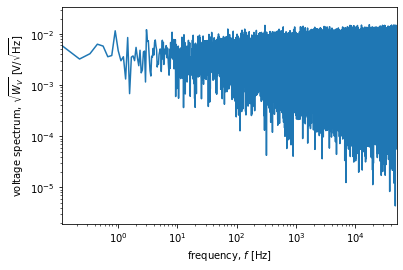

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

t = np.arange(3,12,1e-5)
V = np.random.normal(0,1,t.shape)

# t,V = np.loadtxt("input_file.txt",unpack=True)     # use this if you are importing data from a file

# spectral density calculation
T = t[-1] - t[0]
dt = t[1] - t[0]
sampling_rate = 1/dt

V_T = V/np.sqrt(T)
V_f = np.fft.fft(V_T)*dt
S_V = np.abs(V_f)**2
f = np.fft.fftfreq(len(V_T),dt)

W_V = 2*S_V[f>0]   # keep only positive frequencies
f = f[f>0]         # keep only positive frequencies
df = f[1]-f[0]

# check that the fft function behaves properly, by verifying Parseval's theorem
V_rms_time = np.sqrt(np.trapz(V**2,x=t,dx=dt)/T)
print(f"Time domain root-mean-squared = {V_rms_time}")

V_rms_freq = np.sqrt(np.trapz(W_V,x=f,dx=df))
print(f"Frequency domain root-mean-squared = {V_rms_freq}")

# plot
fig, ax = plt.subplots()
ax.loglog(f,np.sqrt(W_V))
ax.set_ylabel("voltage spectrum, $\sqrt{W_V}$ [V/$\sqrt{\mathrm{Hz}}$]")
ax.set_xlabel("frequency, $f$ [Hz]")
ax.margins(0,0.1)
plt.show()

This trace looks noisy since we only used one realization of the noise process. In practice, you need to average multiple measurements. Remember to average the __power spectral density__ $W_V$ ! 

[Not the signal $V(t)$, the fourier transform $V(f)$ or the spectrum $\sqrt{W_V}$].